# YoloV8 Based Plastic Detection and Prediction
Diya Basu - 21BAI1926

## Setting Variables

In [1]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\spamy\OneDrive\Desktop\project


## Install YOLOv8

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.12.0 torch-2.2.1+cpu CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
Setup complete ✅ (16 CPUs, 15.3 GB RAM, 96.5/377.5 GB disk)


In [1]:
from ultralytics import YOLO
from IPython.display import display, Image

## Preparing a custom dataset

In [6]:
# !mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="sozCru7PBpxEKc4I6K5w")
project = rf.workspace("nurina-kurnia-idmpn").project("plastic-waste-vd6dj")
version = project.version(20)
dataset = version.download("yolov8")

C:\Users\spamy\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\spamy\OneDrive\Desktop\project\datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=800 plots=True

c:\Users\spamy\OneDrive\Desktop\project
^C


Ultralytics YOLOv8.1.27 🚀 Python-3.12.0 torch-2.2.1+cpu CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=c:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_


train: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\train\labels.cache... 2146 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2146/2146 [00:00<?, ?it/s]
train: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\train\labels.cache... 2146 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2146/2146 [00:00<?, ?it/s]

val: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\valid\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\valid\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]
        1/3         0G      1.684      8.585      1.938         80        800:   0%|          | 0/135 [00:13<?, ?it/s]
        1/3         0G      1.684      8.585      1.938         80        800:   1%|          | 1/13

## Training Results

### Labels

c:\Users\spamy\OneDrive\Desktop\project


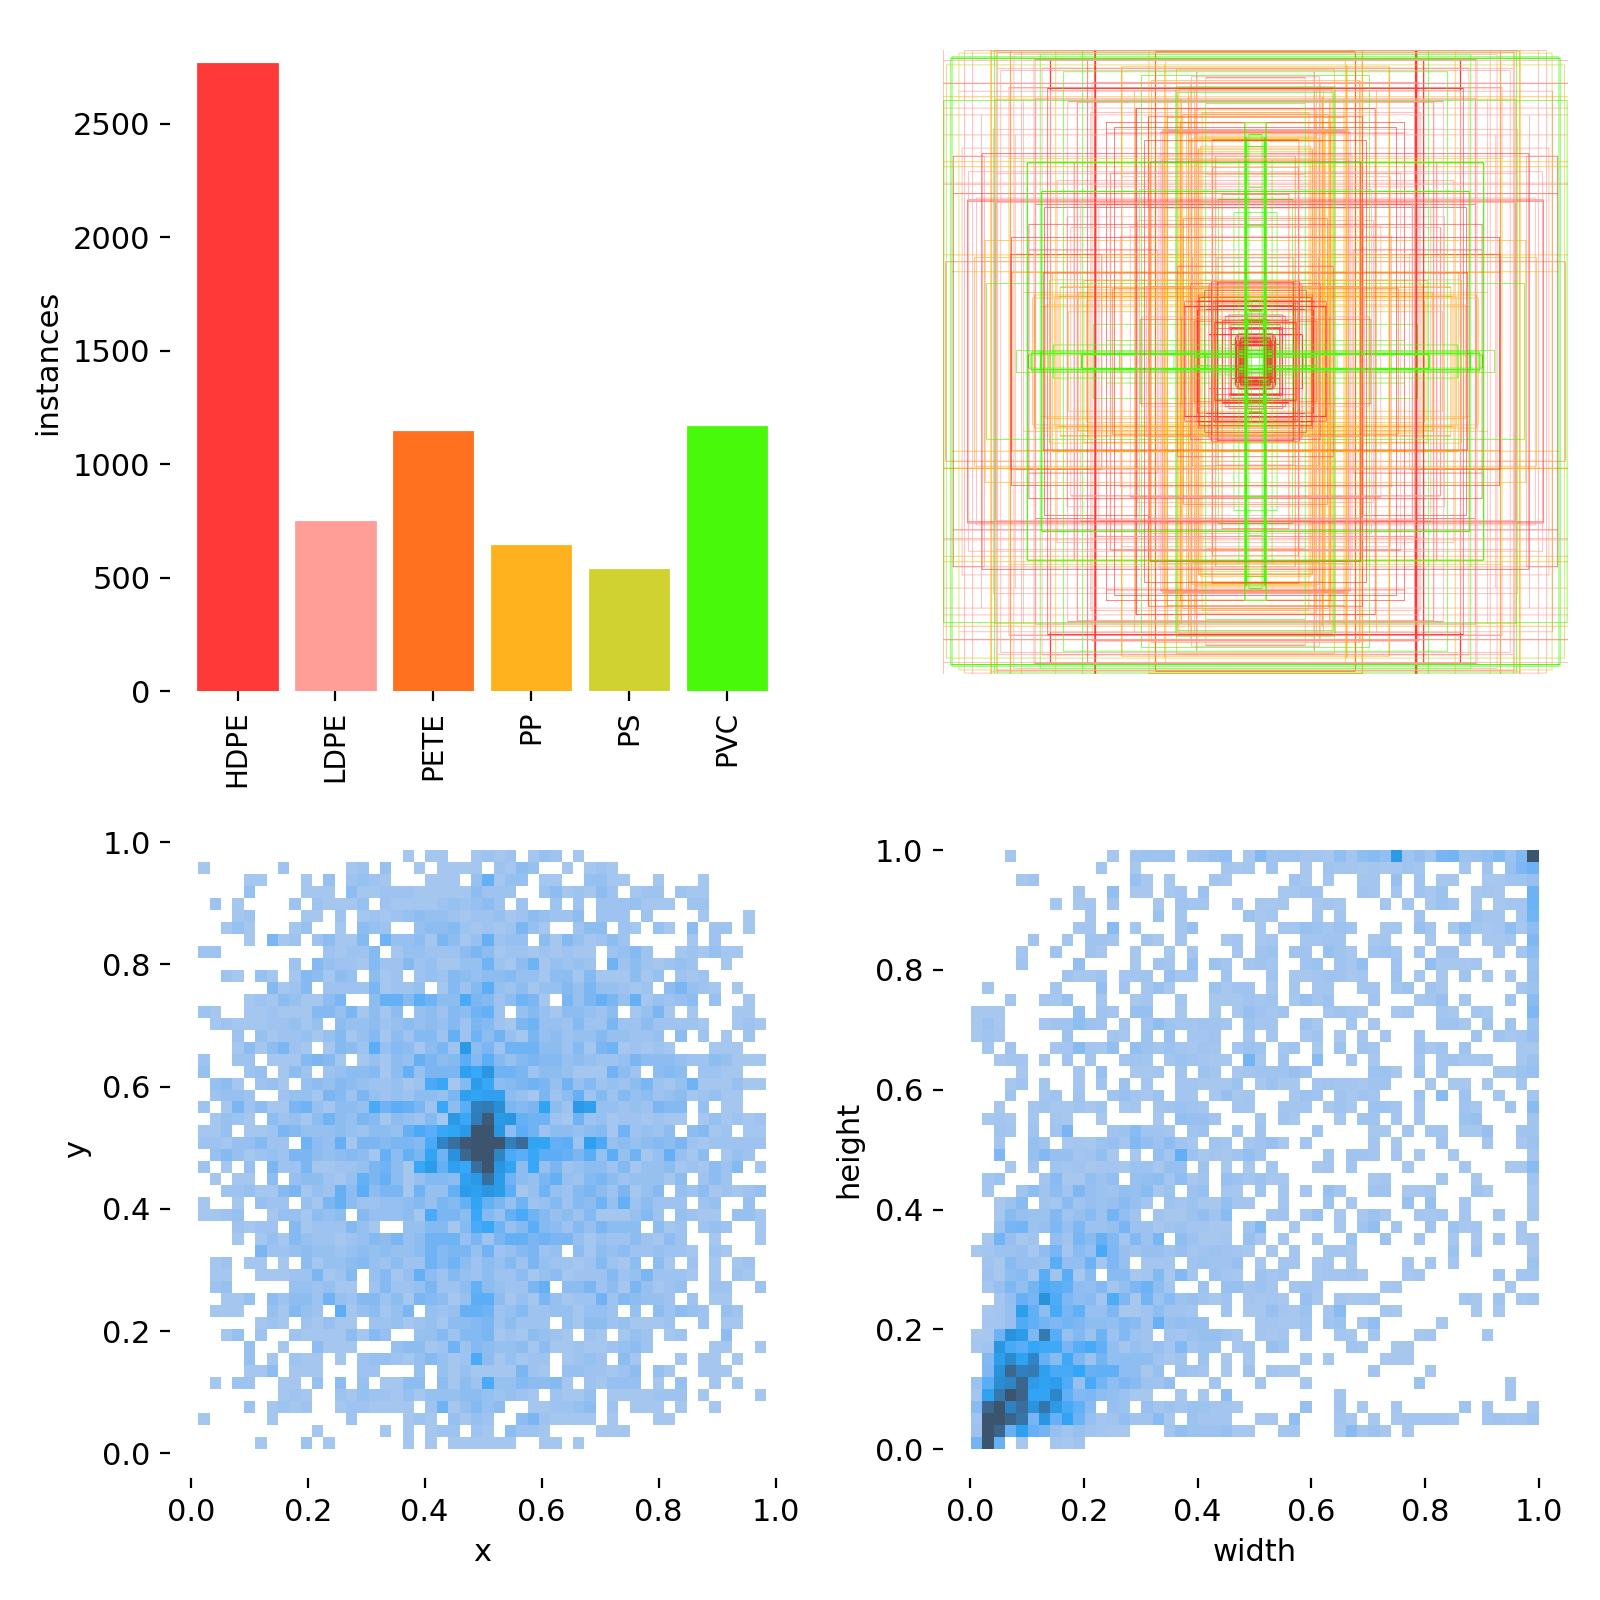

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

### Labels Correlogram

c:\Users\spamy\OneDrive\Desktop\project


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


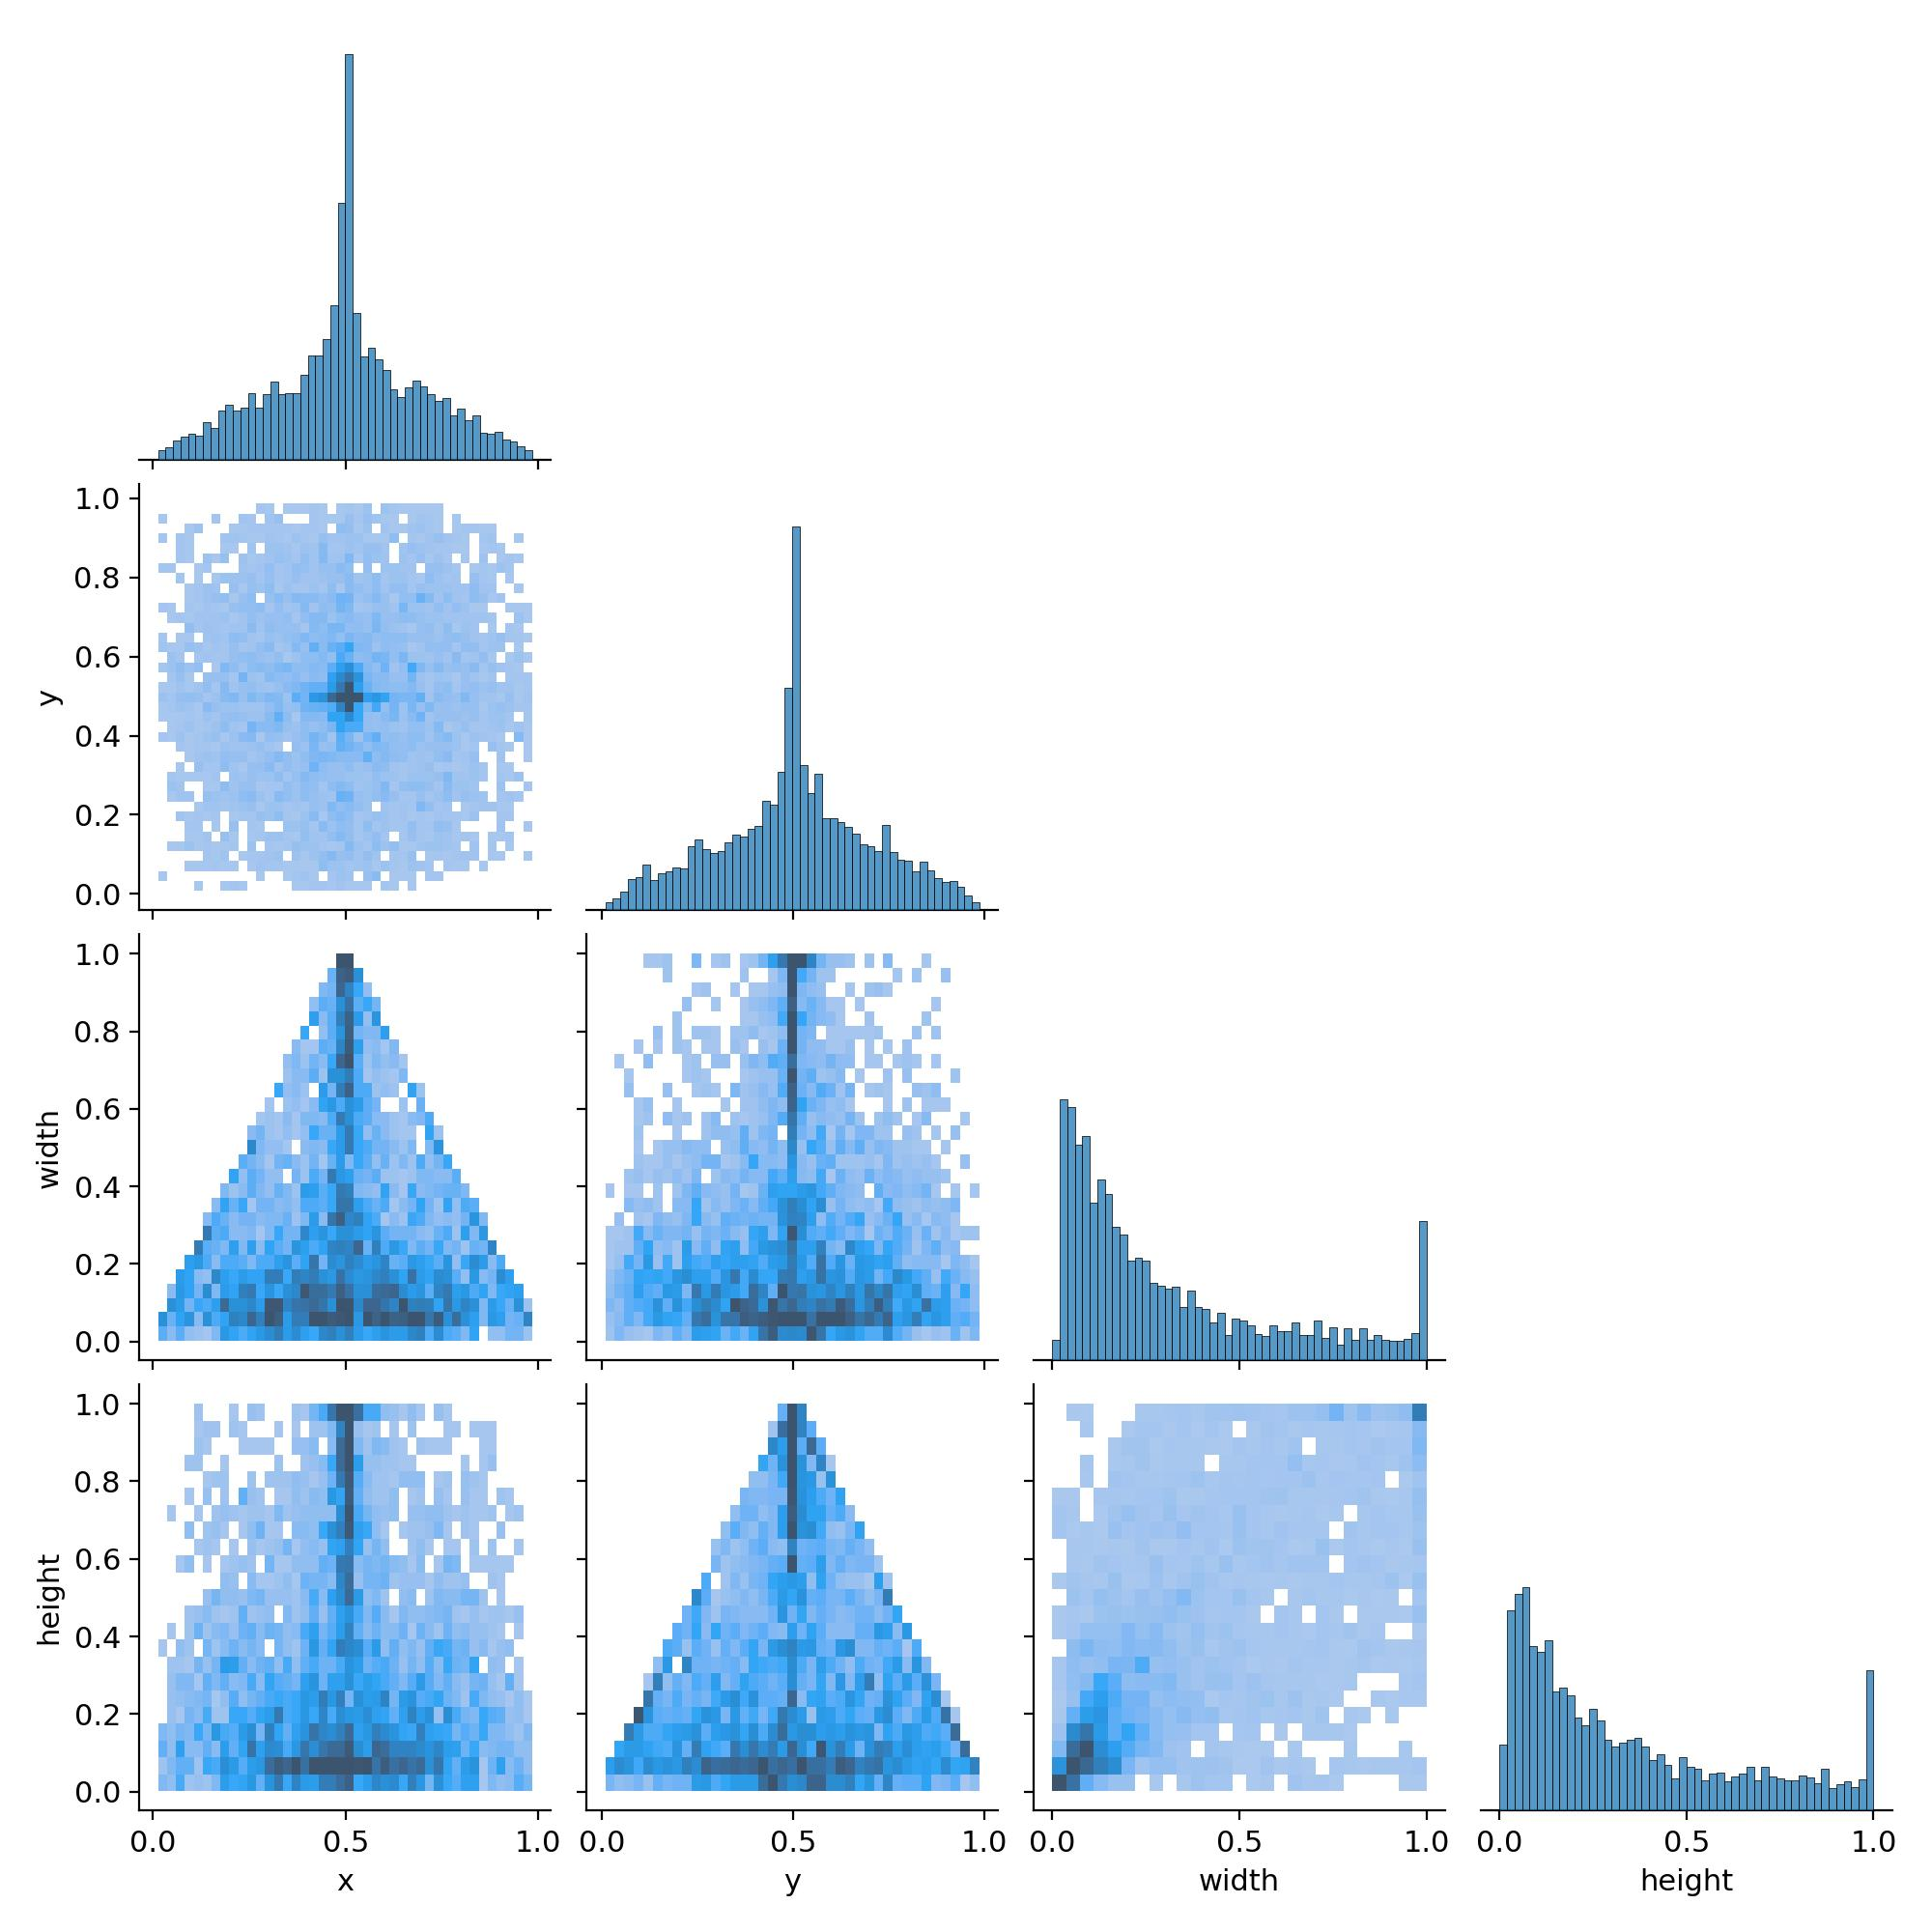

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

### Normalised Confusion Matrix

c:\Users\spamy\OneDrive\Desktop\project


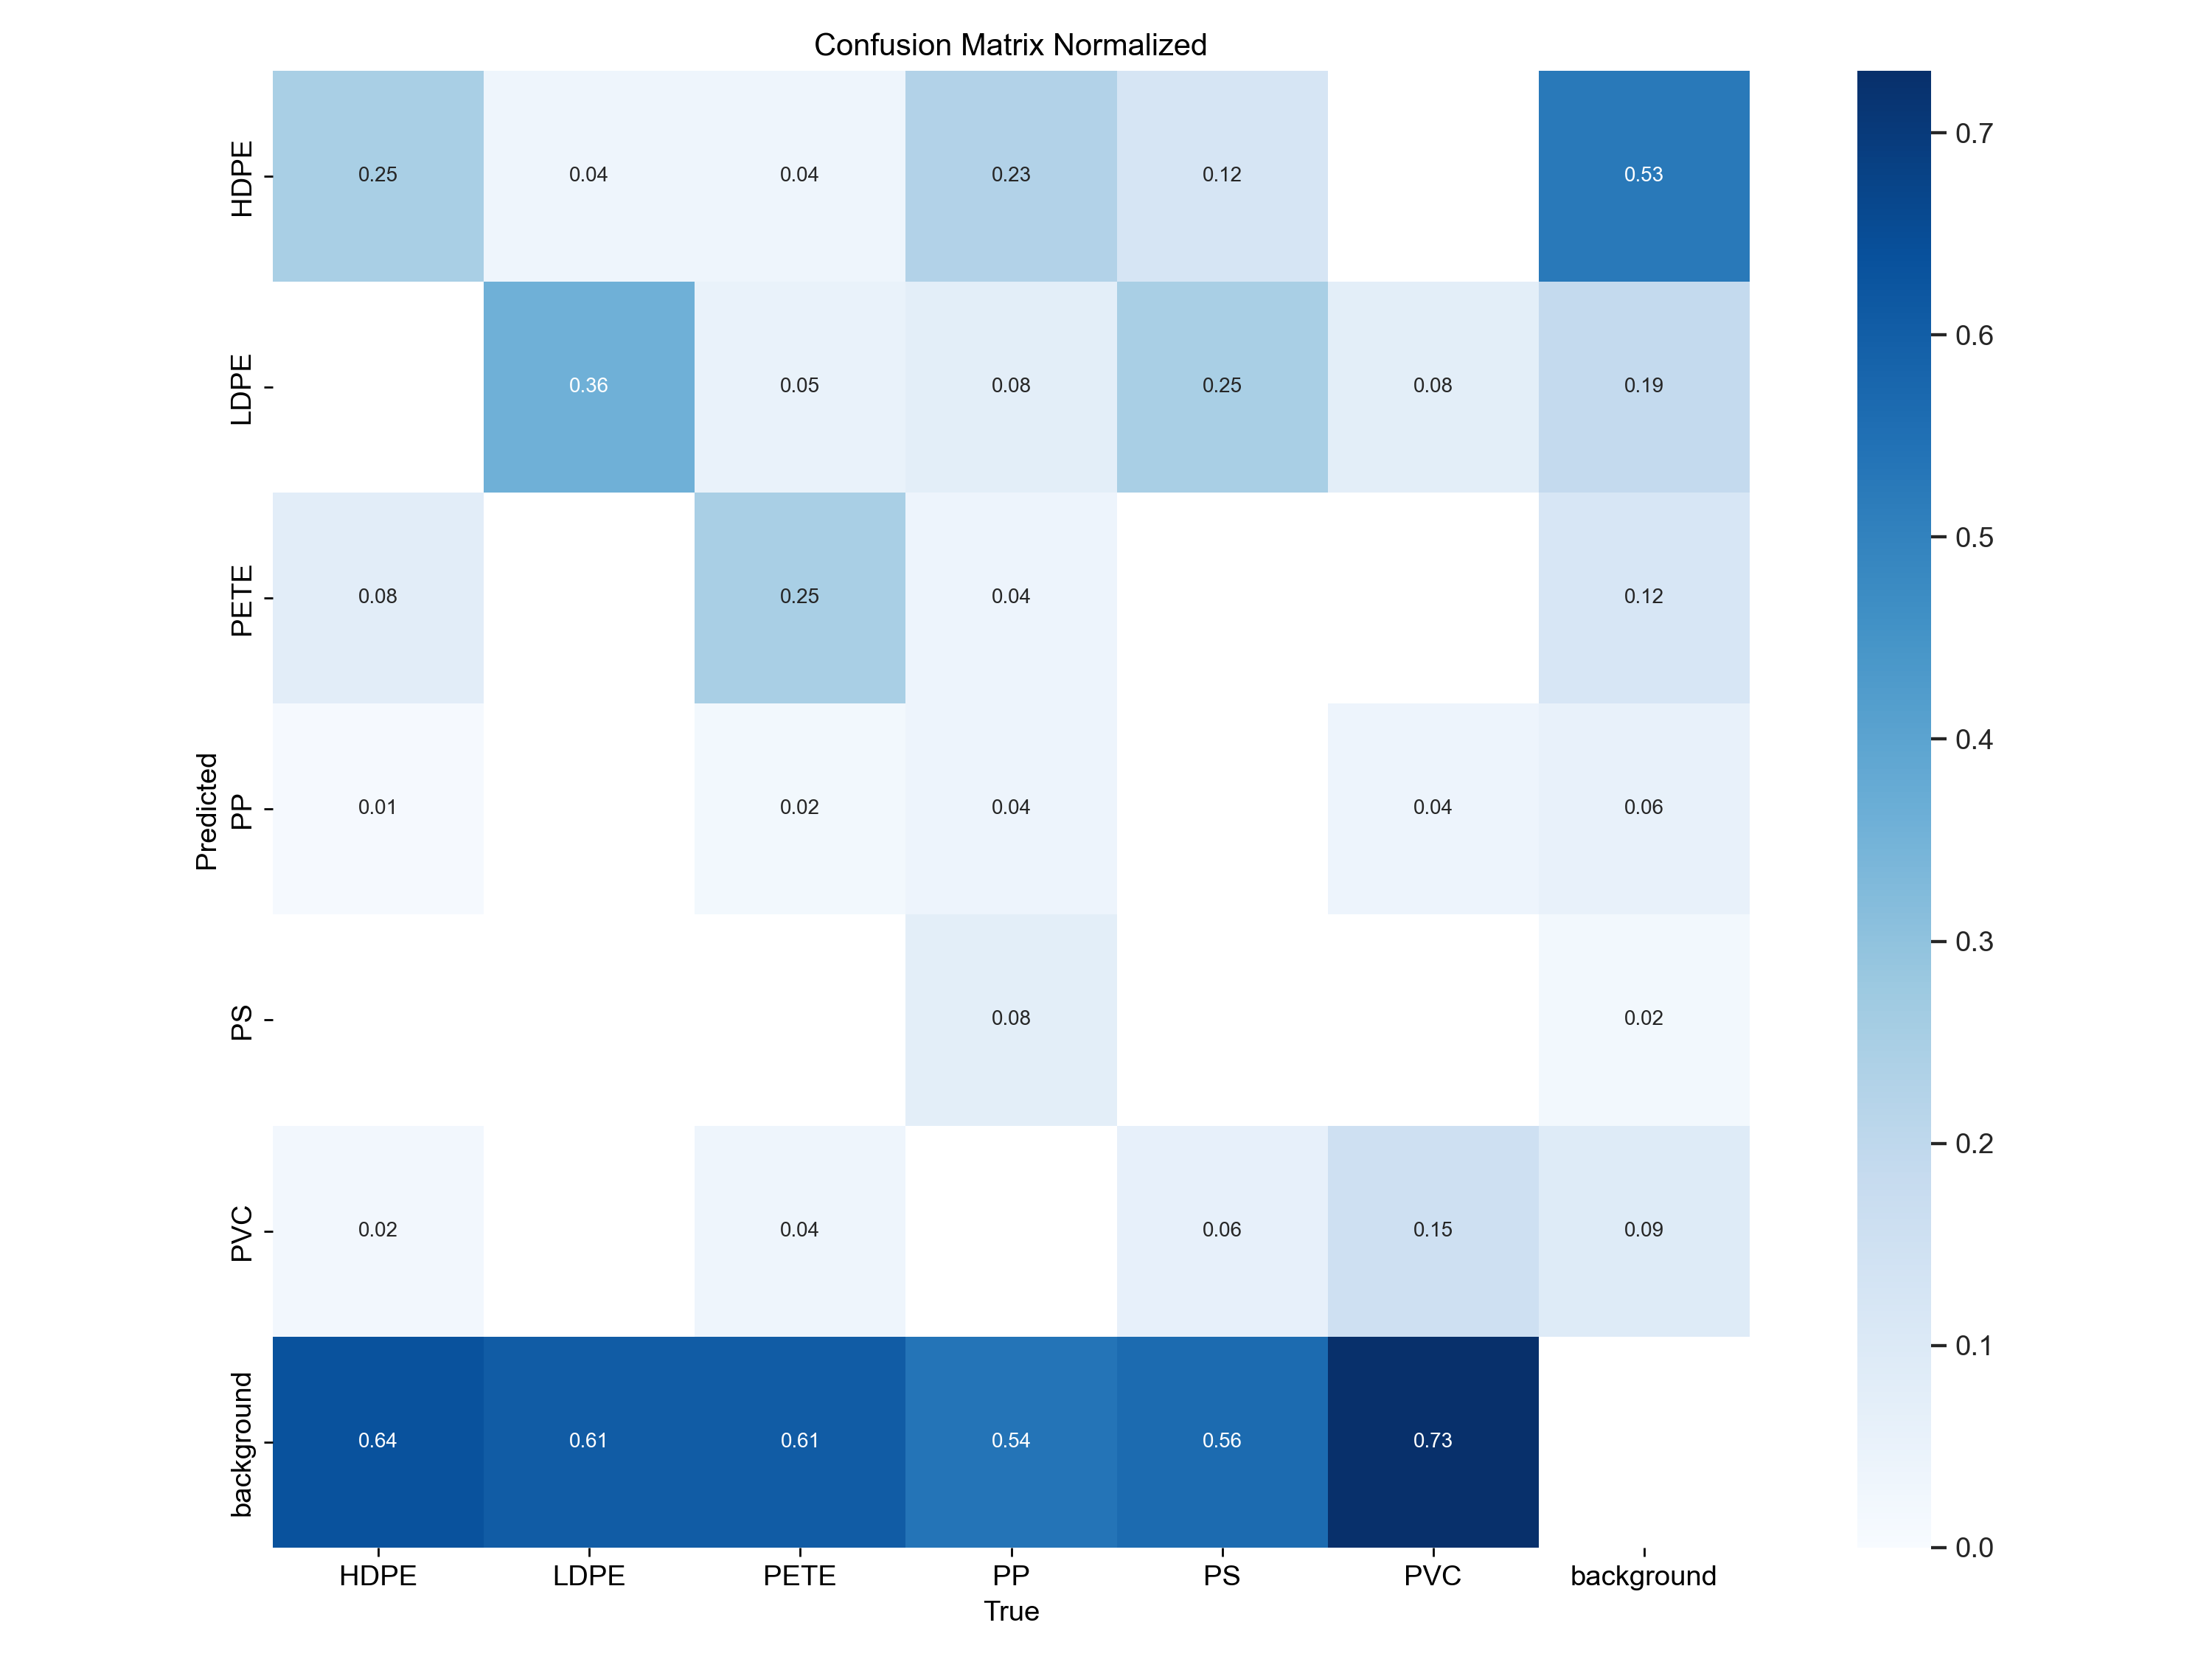

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=600)

### Precision Curves

In [30]:
%cd {HOME}
import ipyplot

images_array = [f'{HOME}/runs/detect/val/F1_Curve.png', f'{HOME}/runs/detect/val/P_Curve.png', f'{HOME}/runs/detect/val/PR_Curve.png', f'{HOME}/runs/detect/val/R_Curve.png']
ipyplot.plot_images(images_array, max_images=5, img_width=500)

c:\Users\spamy\OneDrive\Desktop\project


### Detection Labels/Predictions

In [29]:
%cd {HOME}
import ipyplot

images_array = [f'{HOME}/runs/detect/val/val_batch0_labels.jpg', f'{HOME}/runs/detect/val/val_batch0_pred.jpg']
ipyplot.plot_images(images_array, max_images=2, img_width=500)

c:\Users\spamy\OneDrive\Desktop\project


In [31]:
%cd {HOME}
import ipyplot

images_array = [f'{HOME}/runs/detect/val/val_batch1_labels.jpg', f'{HOME}/runs/detect/val/val_batch1_pred.jpg']
ipyplot.plot_images(images_array, max_images=2, img_width=500)

c:\Users\spamy\OneDrive\Desktop\project


In [32]:
%cd {HOME}
import ipyplot

images_array = [f'{HOME}/runs/detect/val/val_batch2_labels.jpg', f'{HOME}/runs/detect/val/val_batch2_pred.jpg']
ipyplot.plot_images(images_array, max_images=2, img_width=500)

c:\Users\spamy\OneDrive\Desktop\project


## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

c:\Users\spamy\OneDrive\Desktop\project
Ultralytics YOLOv8.1.27 🚀 Python-3.12.0 torch-2.2.1+cpu CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients
                   all        100        240      0.116      0.279      0.101     0.0492
                  HDPE        100         88      0.153      0.375      0.111     0.0538
                  LDPE        100         28      0.108      0.425      0.198      0.105
                  PETE        100         56      0.194      0.339      0.117     0.0512
                    PP        100         26     0.0278     0.0385      0.036     0.0175
                    PS        100         16      0.126      0.188     0.0881     0.0499
                   PVC        100         26     0.0854      0.308     0.0544      0.018
Speed: 2.7ms preprocess, 260.0ms inference, 0.0ms loss, 18.4ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/m


val: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\valid\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning C:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\valid\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:04<00:24,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:08<00:20,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:13<00:18,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|███

## Inference with Custom Model

In [33]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

c:\Users\spamy\OneDrive\Desktop\project
Ultralytics YOLOv8.1.27 🚀 Python-3.12.0 torch-2.2.1+cpu CPU (AMD Ryzen 7 7840HS w/ Radeon 780M Graphics)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients

image 1/50 c:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\test\images\00000062_jpg.rf.3d8575ba21d8f00b9652df01b964a961.jpg: 800x800 (no detections), 232.4ms
image 2/50 c:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\test\images\00000367_jpg.rf.453a5ae9fe0936b522390125ec75e1a6.jpg: 544x800 1 LDPE, 141.4ms
image 3/50 c:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\test\images\01096b3ed7b69661053faf91e0f3a61e_jpg.rf.f0b8089381e7fc55e3dd8688227b7e03.jpg: 800x544 1 HDPE, 1 PETE, 141.5ms
image 4/50 c:\Users\spamy\OneDrive\Desktop\project\datasets\Plastic-Waste-20\test\images\03e3420b2832ab83c044d1096c4d13c8_jpg.rf.29706b6347f4e890e6810a68ece88995.jpg: 800x800 1 HDPE, 1 PP, 1 PVC, 169.7ms
image 5/50 c:\Users\spamy\OneDrive\Deskt

### Individual Results Labels

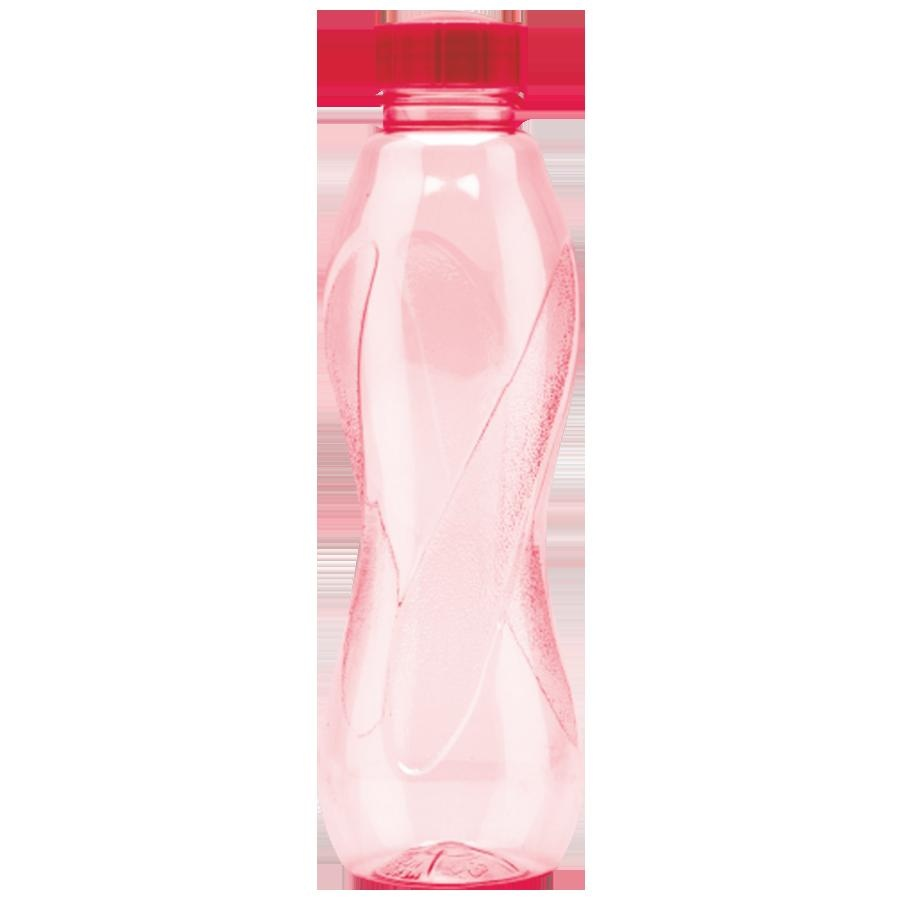

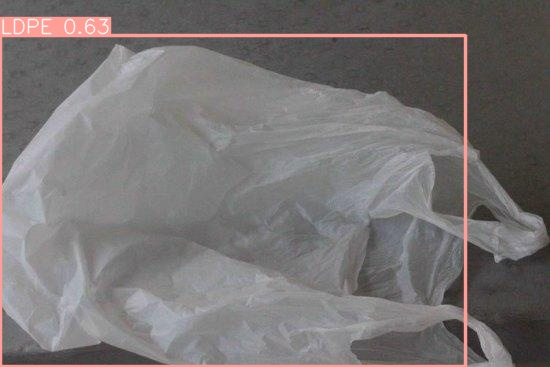

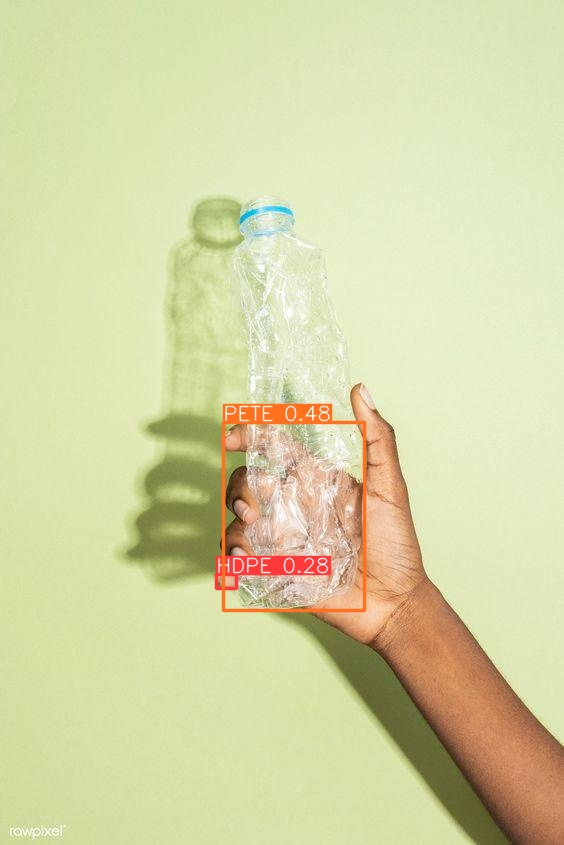

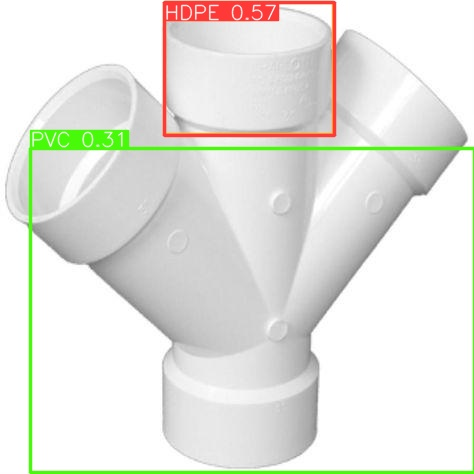

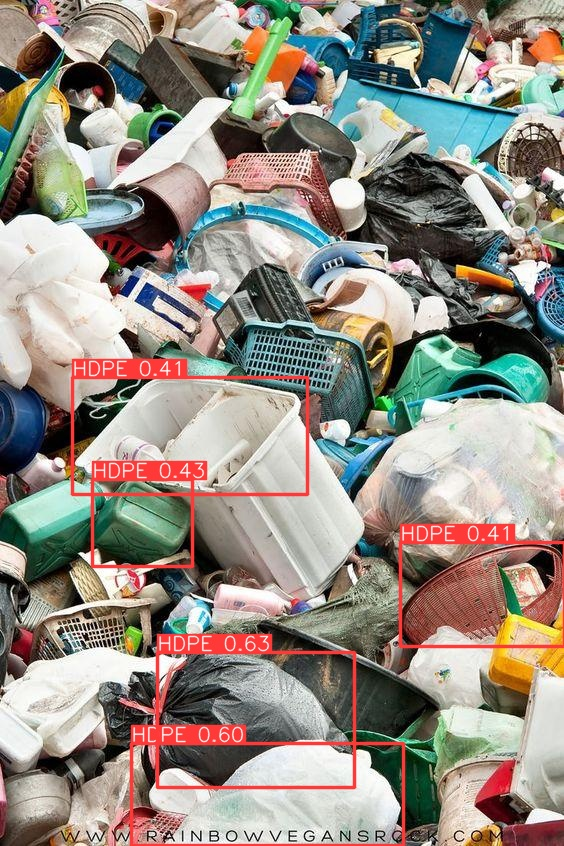

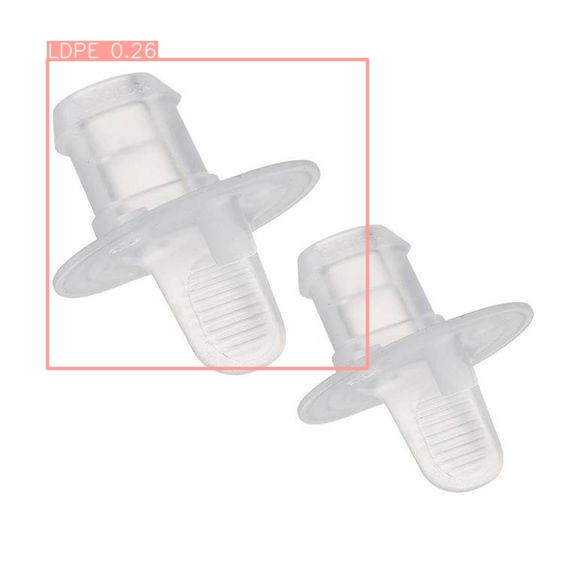

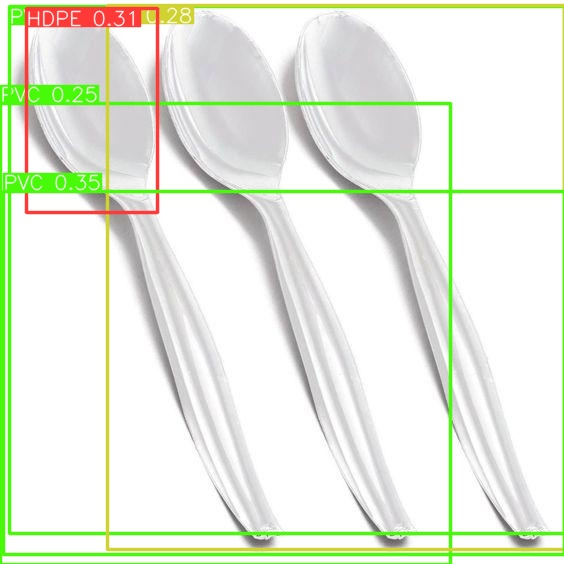

In [38]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:7]:
      display(Image(filename=image_path, width=300))